In [3]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read and Merge Dengue Data
# loading do CSV de features e labels e merge dos dados:
# loading do CSV de features e labels e merge dos dados:
df_features = pd.read_csv("dados/dengue_features_train.csv", na_values=[" ","...","na","NA","nan","Na"])
df_labels = pd.read_csv("dados/dengue_labels_train.csv",na_values=[" ","...","na","NA","nan","Na"])
df_dengue = pd.merge(df_features,df_labels)

In [5]:
### Contando dados nulos:
df_dengue.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [6]:
### Suprimindo as colunas que identificam nomes, períodos ou ciclos da tabela de treino e teste.
df_dengue = df_dengue[['weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases']]

In [7]:
#### Change Nan values by mean (train input)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df_dengue_clean = imp.fit(df_dengue).transform(df_dengue)
df_dengue_clean = pd.DataFrame(df_dengue_clean)
df_dengue_clean

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,18.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,19.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,20.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,21.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,22.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,21.0,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5.0
1452,22.0,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8.0
1453,23.0,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1.0
1454,24.0,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1.0


In [8]:
%%html
<h2 align="center"> 1 - Treinando o primeiro modelo de ML - Regressão linear </h2>

In [9]:
# SPLIT dos dados - training and test
from sklearn.model_selection import train_test_split
y = df_dengue_clean[21]
X = df_dengue_clean.drop(columns=21, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
y

0       4.0
1       5.0
2       4.0
3       3.0
4       6.0
       ... 
1451    5.0
1452    8.0
1453    1.0
1454    1.0
1455    4.0
Name: 21, Length: 1456, dtype: float64

In [11]:
## Training a model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [12]:
lm.score(X_test,y_test)
#### Modelo com baixíssima qualidade de Score para regressão Linear

0.14943668324273984

In [13]:
%%html
<h2 align center> Score R2 do primeiro modelo de ML = 0.149 </h2>

In [14]:
#### Y_test vs Predict
pd.DataFrame(lm.predict(X_test), y_test)  

,0
21,
43.0,40.960760
6.0,12.895581
38.0,24.618014
7.0,10.850810
10.0,8.297783
...,...
11.0,35.472610
6.0,4.526221
4.0,18.735491


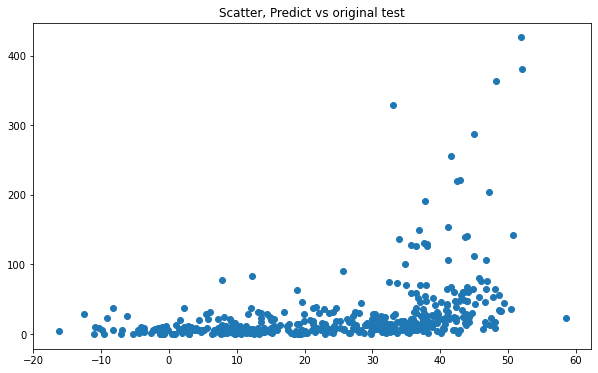

In [15]:
#### Y_test vs Predict - plot
plt.figure(figsize=(10,6))
plt.scatter(lm.predict(X_test), y_test)
plt.title("Scatter, Predict vs original test")
plt.show()

In [16]:
%%html
<h2 align="center"> 2 - No segundo modelo - vamos normalizar os valores de X, antes do split. </h2>

In [17]:
# Normalize X values
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X)
X_norm = scaler.transform(X)

In [18]:
# split data
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [19]:
# Train a normalized model
lm = LinearRegression()
lm.fit(X_train_norm,y_train)

LinearRegression()

In [20]:
lm.score(X_test_norm, y_test)

0.1503719670447904

In [21]:
%%html
<h3> Até o momento, houve desconsiderável evolução do modelo linear, devido à baixa linearidade
de correlação entre features e labels </h3>
<h2 align = center> 3 - Implementar a técnica de transformada log do label </h2>

In [22]:
# Transformada em Log do Array
y_arr = np.array(y)
y_log = []
for x in y_arr:
    if x==0:
        y_log.append(x)
    else:
        y_log.append(np.log(x))

In [23]:
### Split dos dados
X_train_norm, X_test_norm, y_log_train, y_log_test = train_test_split(X_norm, y_log, test_size=0.3, random_state=42)

In [24]:
# Train a normalized model and log label
lm = LinearRegression()
lm.fit(X_train_norm,y_log_train)

LinearRegression()

In [25]:
round(lm.score(X_test_norm, y_log_test),2)

0.35

In [26]:
%%html
<h3> Nice ! O modelo progrediu para R2 = 0.35, com a transformação log do label (feature Engineer).

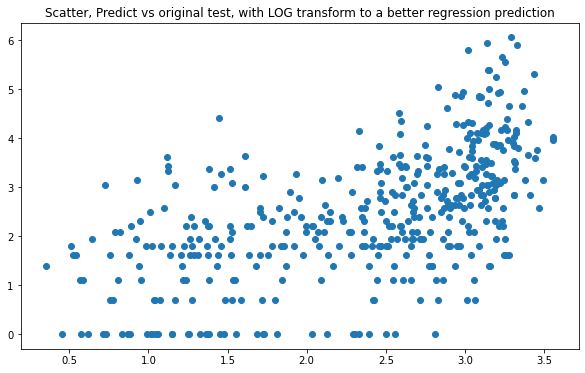

In [27]:
#### Y_test vs Predict - plot
plt.figure(figsize=(10,6))
plt.scatter(lm.predict(X_test_norm), y_log_test)
plt.title("Scatter, Predict vs original test, with LOG transform to a better regression prediction")
plt.show()

In [28]:
%%html
<br><br>
<h2> ANALISAR OS COEFICIENTES DE LINEARIDADE E FAZER O TESTE COM OS MAIS SIGNIFICATIVOS</h2>
<br><br>

In [29]:
### Listando a significancia dos coeficientes para o modelo.
coef = lm.coef_
pd.DataFrame(coef, X.columns)
linear_coef_dict = {"column" : X.columns, "coef" : coef}
linear_coef_log_model = pd.DataFrame(linear_coef_dict).abs().sort_values(by="coef", ascending=False)
linear_coef_log_model

,column,coef
2,2.0,804.337674
3,3.0,679.435708
4,4.0,348.764025
14,14.0,169.827162
16,16.0,107.126910
15,15.0,101.000321
8,8.0,85.353354
1,1.0,79.012400
6,6.0,76.641222
7,7.0,73.128871


In [30]:
#### Construir um modelo com somente os coeficientes mais significativos:
X_new = X[[2,3,4,14,16,15,8,1,6,9,18,12,0]]
# split
X_train_norm, X_test_norm, y_log_train, y_log_test = train_test_split(X_new, y_log, test_size=0.3, random_state=42)
# model
lm = LinearRegression()
lm.fit(X_train_norm,y_log_train)
#Evaluation R2:
lm.score(X_test_norm, y_log_test)


0.3666003596136308

In [31]:
%%html
<h2> Para a escolha de um label na escala LOG e com os melhores coeficientes, o modelo linear 
evouliu para um Score R2 = "0,366"

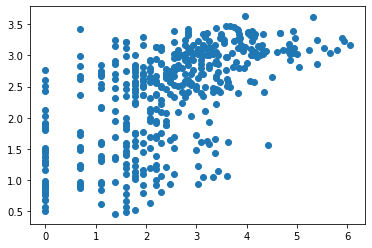

In [32]:
plt.scatter(y_log_test, lm.predict(X_test_norm))

In [33]:
%%html
<h2 align=center> 4 - Teste com GLM - General Linear Model

In [34]:
from sklearn.linear_model import TweedieRegressor
glm = TweedieRegressor(power=1)
glm.fit(X_train_norm, y_train)
glm.score(X_test_norm, y_test)

/home/mcolazin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


0.3333850174268551

In [35]:
%%html
<h2 align="center"> 5 - Transformações e pipeline Polinomial </h2>

In [38]:
## Testando um modelo de pipeline com X new
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# Dedfining model for polinomial and ML
pol = PolynomialFeatures(degree=2)
ml = LinearRegression()

# Define ML pipeline
pipeline = Pipeline(steps=[("p", pol), ("m", ml)])

# Evaluation
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=5, random_state=5)
cross_val_score(pipeline, X_norm, y, scoring="r2",cv=cv).mean()





/home/mcolazin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/mcolazin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/mcolazin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/mcolazin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.13404267676190015